# demo04_鸢尾花分类

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as sd

In [2]:
# 加载鸢尾花数据集
iris = sd.load_iris()
iris.keys() # ['data', 'target', 'target_names', 'DESCR', 'feature_names']
# print(iris.DESCR)
# iris.feature_names

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
# 整理数据，做简单数据分析
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [5]:
# 按照鸢尾花的种类分组，观察其他四个特征的特点
data.pivot_table(index='target')

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
target,,,,
0,1.464,0.244,5.006,3.418
1,4.260,1.326,5.936,2.770
2,5.552,2.026,6.588,2.974


## 数据可视化，绘制样本散点图

In [6]:
import matplotlib.pyplot as plt
data.plot.scatter(
    x='petal length (cm)', y='petal width (cm)', 
    c='target', cmap='brg')

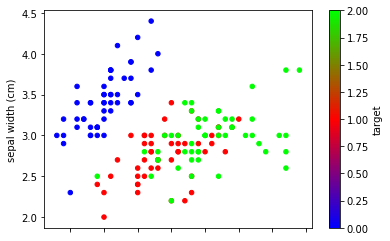

In [7]:
data.plot.scatter(
    x='sepal length (cm)', y='sepal width (cm)', 
    c='target', cmap='brg')

## 绘制逻辑函数  sigmoid

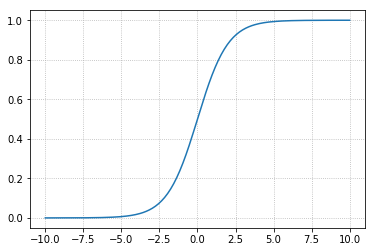

In [8]:
x = np.linspace(-10, 10, 200)
y = 1 / (1 + np.exp(-x))
plt.grid(linestyle=':')
plt.plot(x, y)

## 针对鸢尾花数据集，使用逻辑回归完成二分类业务

In [9]:
import sklearn.model_selection as ms
import sklearn.linear_model as lm

sub_data = data.tail(100)
# 整理输入集与输出集 
x, y = sub_data.loc[:, :'petal width (cm)'], sub_data['target']
# 拆分测试集与训练集
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.1, random_state=7)
# 训练模型
model = lm.LogisticRegression(C=1)
model.fit(train_x, train_y)
# 模型评估
# pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print(pred_test_y)
print(test_y.values)
print((pred_test_y==test_y).sum() / test_y.size)

[1 1 2 2 1 1 2 2 2 2]
[1 1 2 2 1 1 2 2 2 1]
0.9


## 多元分类任务

In [10]:
import sklearn.model_selection as ms
import sklearn.linear_model as lm

# 整理输入集与输出集 
x, y = data.loc[:, :'petal width (cm)'], data['target']
# 拆分测试集与训练集
train_x, test_x, train_y, test_y = \
    ms.train_test_split(
        x, y, test_size=0.2, random_state=7, stratify=y)

## 交叉验证

In [17]:
import sklearn.model_selection as ms
# 训练模型
model = lm.LogisticRegression(C=1)
# 交叉验证
s = ms.cross_val_score(model, x, y, cv=5, scoring='accuracy')
print(s.mean())
s = ms.cross_val_score(model, x, y, cv=5, scoring='precision_weighted')
print(s.mean())
s = ms.cross_val_score(model, x, y, cv=5, scoring='recall_weighted')
print(s.mean())
s = ms.cross_val_score(model, x, y, cv=5, scoring='f1_weighted')
print(s.mean())

0.9600000000000002
0.9652214452214454
0.9600000000000002
0.959522933505973


In [12]:
model.fit(train_x, train_y)
# 模型评估
# pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print(pred_test_y)
print(test_y.values)
print((pred_test_y==test_y).sum() / test_y.size)

[2 0 0 1 2 1 2 0 2 2 1 0 0 2 1 1 0 0 1 1 2 0 1 0 2 2 1 1 0 2]
[2 0 0 1 2 1 2 0 2 2 1 0 0 1 1 1 0 0 1 1 2 0 1 0 2 2 2 1 0 2]
0.9333333333333333


## 混淆矩阵

In [18]:
import sklearn.metrics as sm
cm = sm.confusion_matrix(test_y, pred_test_y)
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]], dtype=int64)

## 分类报告

In [20]:
cr = sm.classification_report(test_y, pred_test_y)
print(cr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.90      0.90      0.90        10
          2       0.90      0.90      0.90        10

avg / total       0.93      0.93      0.93        30



1. 需求分析
2. 数据收集、预处理
3. 整理输入输出集
4. 拆分训练、测试集
5. 选择模型、创建模型
6. 交叉验证调参
7. 训练模型
8. 模型评估、混淆矩阵、分类报告

### 绘制错误样本

In [13]:
# 获取错误数据
error_samples = test_x[pred_test_y != test_y]

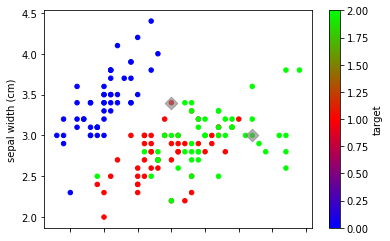

In [14]:
ax = data.plot.scatter(
    x='sepal length (cm)', y='sepal width (cm)',
    c='target', cmap='brg')
error_samples.plot.scatter(
    x='sepal length (cm)', y='sepal width (cm)', 
    color='gray', s=80, marker='D', ax=ax, alpha=0.6)